# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Открываем файлы и изучаем общую информацию. 

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# открываем файл из директории или по ссылке 
#(разделителем в датасете является символ табуляции '\t')
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [3]:
#Посмотрим полную информацию датафрейма:  
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Таблица состоит из 22 столбцов и 23699 записей, 14 столбцов явно содержат пропущенные значения:

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип) - нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

In [4]:
# Установим опцию по выводу всех колонок dataframe
pd.set_option('display.max_columns', None)

In [5]:
# Посмотрим первые 10 строк dataframe
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [6]:
# Познакомимся с данными поближе и просмотрим числовые значения методом describe()
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


*Вывод на основе описательных данных:*


- *rooms:* минимальное число комнат - 0. Как вариант это может быть квартира-студия. Нужно проверить.

- *ceiling_height:* минимальная высота потолков 1 метр, максимальная - 100 метров. Явно выбивающиеся значения

- *living_area:* min жилая площадь 2 м² слишком маленькая, чтобы быть правдой.

- *kitchen_area:* min площадь кухни 1,3 м² ошибочное значение(маленькая площадь).

- *airports_nearest:* min расстояние до аэропорта 0 м невозможно. Два варианта событий: либо нет данных и заполнили нулем, либо ошибка. 

- *days_exposition:* минимальное количество дней размещения объявления - 1. Продажа недвижимости за 1 день или снятие объявления по другой причине - если таких объявлений много, то такие данные могут негативно влиять на среднее. Максимальное значение - 1580 дней (больше 4-х лет) также может негативно влиять на среднее время.

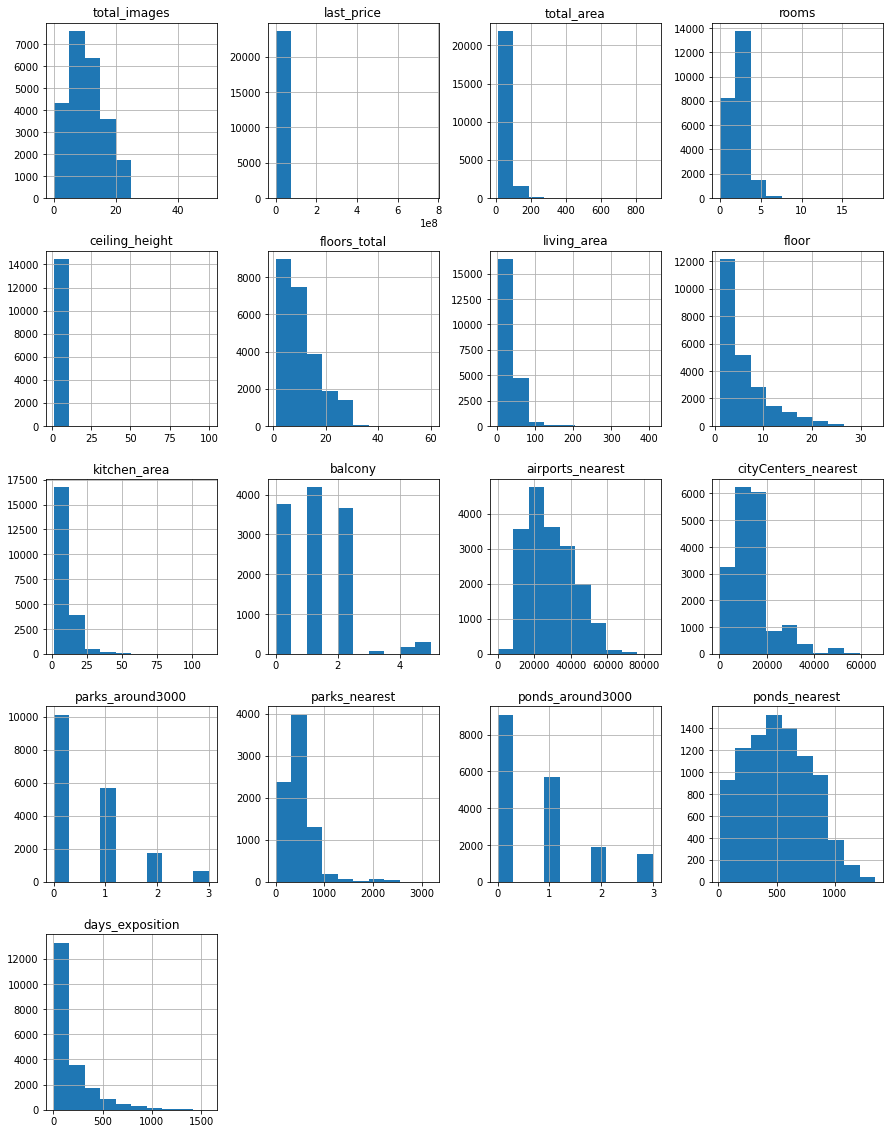

In [7]:
# построим гистораммы для датасета
data.hist(figsize=(15, 20))
plt.show()

# Вывод
На основании проведенного ознакомления с датафремом основную долю внимания придётся уделить пропущенным/отсутствующим значениям в таблице. А так же в таблице есть некоторые данные, которые сильно выбиваются из общей массы по значениям, необходимо будет ознакомиться с ними подробнее. Приведем названия столбцов к единому стилю.

### Предобработка данных

***Приведем имена столбцов к единому стилю.***

In [8]:
# Переименовываем
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                            'parks_around3000': 'parks_around_3000', 
                            'ponds_around3000': 'ponds_around_3000'})
# Проверяем
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [9]:
# посмотрим количество пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Описание пропущеных значений**

Количество обнаруженных Null из 23699:

- *ceiling_height:* 9195 пропусков  - более чем в трети объявлений пропущена высота потолков, оставим Null.

- *floors_total:* 86  - данные просто не заполнили, из выборки, оставим Null.

- *living_area:* 1903 - оставим Null.

- *is_apartment:* 2775 - значений, можем предположить что это не апартаменты и присвоить False.

- *kitchen_area:* 2278 - Вероятно, не указан точный метраж кухни, т.к. не знают его. Количество не превышает 10% - оставим Null.

- *balcony:* 11519 - скорее всего там нет балконов, заполняем 0

- *locality_name:* 49 - данные просто не заполнили, оставим Null

- *airports_nearest:* 5542  - аэропортов рядом нет, оставляем Null

- *city_centers_nearest:* 5519 - центр города не близко, оставляем Null

- *parks_around3000:* 5518 - значит парков нет в радиусе 3км, оставляем Null

- *parks_nearest:* 15620 - значит парков нет, оставляем Null

- *ponds_around3000:* 5518 - значит прудов нет в радиусе 3км, оставляем Null

- *ponds_nearest:* 14589 - оставляем Null

- *days_exposition:* 3181 - объявление не было опубликовано, оставляем Null

#### Заполним пропущенные значения там, где это возможно

##### Столбец `balcony`

Если продавец не указал число балконов - скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0

In [10]:
# заменяем пропуски на 0 и проверим
data['balcony'].fillna(0, inplace=True)
data['balcony'].isna().sum()

0

*Пропуски в столбе balcony - отсутствуют.*

##### Столбец `is_apartment`

Участники рынка недвижимости в большинстве случаев понимают различие между "апартаментами" и обычной квартирой, поэтому в значениях, где стоит "True" сомнений нет.

Заполним оставшиеся пропуски значениями False по умолчанию.

In [11]:
# заменяем пропуски на False и проверим
data['is_apartment'].fillna(False, inplace=True)
data['is_apartment'].isna().sum()

0

*Пропуски в столбе is_apartment - отсутствуют.*

##### Столбец `kitchen_area`

Согласно норматива, кухня не может быть менее 5 м2. Выполним выборку по данному значению:

In [12]:
data.query('kitchen_area < 5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
76,12,2800000.0,55.1,2016-05-14T00:00:00,3,2.60,5.0,38.4,1,False,False,False,4.9,0.0,Кировск,NaN,NaN,NaN,NaN,NaN,NaN,606.0
298,9,2650000.0,42.8,2017-04-25T00:00:00,2,NaN,5.0,30.0,3,False,False,False,4.5,0.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,49.0
422,8,1700000.0,55.2,2018-03-24T00:00:00,3,2.50,5.0,38.5,5,False,False,False,4.5,0.0,Кириши,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,15,2600000.0,27.0,2017-07-10T00:00:00,1,2.75,23.0,18.0,18,False,False,False,2.0,0.0,Санкт-Петербург,22131.0,17459.0,0.0,NaN,1.0,411.0,10.0
1327,6,2650000.0,46.2,2016-12-01T00:00:00,2,2.50,5.0,29.2,5,False,False,False,4.9,0.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22839,14,3350000.0,27.0,2018-11-03T00:00:00,1,2.70,16.0,NaN,6,False,False,False,4.0,2.0,Санкт-Петербург,41935.0,9551.0,0.0,NaN,0.0,NaN,35.0
22849,6,2380000.0,25.0,2016-03-22T00:00:00,1,NaN,25.0,19.0,15,False,False,False,4.0,1.0,посёлок Шушары,13461.0,19247.0,0.0,NaN,1.0,351.0,140.0
23110,1,2900000.0,34.0,2018-02-01T00:00:00,2,2.90,2.0,20.0,1,False,False,False,4.0,0.0,посёлок Стрельна,27006.0,23832.0,0.0,NaN,2.0,872.0,196.0
23498,7,1600000.0,54.0,2016-12-26T00:00:00,2,2.30,1.0,33.0,1,False,False,False,3.5,0.0,Высоцк,NaN,NaN,NaN,NaN,NaN,NaN,281.0


In [13]:
# найдем медианное значение площади кухни свыше 5 кв.м., заменим ошибочные значений на медианное и прверим
median_kitchen_aria = data.query('kitchen_area > 5')['kitchen_area'].median()
data.loc[data['kitchen_area'] < 5, 'kitchen_area'] = median_kitchen_aria
data.query('kitchen_area < 5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


В объявлениях часто не указывают площадь кухни, если она не выделена в отдельную комнату: в квартирах со свободной планировкой и в квартирах-студиях.
Площадь кухни в этом случае входит в состав общей жилой площади.

In [14]:
data['kitchen_area'].where((data['kitchen_area'].isna()) & (data['studio']),0)
data['kitchen_area'].where((data['kitchen_area'].isna()) & (data['open_plan']),0)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
23694    0.0
23695    0.0
23696    0.0
23697    0.0
23698    0.0
Name: kitchen_area, Length: 23699, dtype: float64

Для таких объявлений заполним отсутствующую информацию медианными значениями, через коэфициент, отражающий медианную долю кухни площади в общей площади квартиры.

In [15]:
# Коэфициент доли площади кухни в общей площади квартиры (рассчитанный по медианным значениям):
kitchen_area_k_median = data['kitchen_area'].median() / data['total_area'].median()

In [16]:
# Применим полученные коэфициент, чтобы заполнить пропуски
data['kitchen_area'] = data['kitchen_area'].fillna(kitchen_area_k_median*data['total_area'])

In [17]:
data['kitchen_area'].isna().sum()

0

*Пропуски в столбе kitchen_area - отсутствуют.*

##### Столбец `ceiling_height`

In [18]:
# посмотрим на столбец
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Можно заметить, что встречаются также потолки размером свыше 20 метров. Логично предположить, что на самом деле это вещественные значения: 2-3 метра. Следовательно нужно поделить такие значения на 10

In [19]:
# Для значений больше 20 применим деление на 10
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height'] / 10

In [20]:
# Проверим
data['ceiling_height'].describe()

count    14504.000000
mean         2.729608
std          0.319850
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         14.000000
Name: ceiling_height, dtype: float64

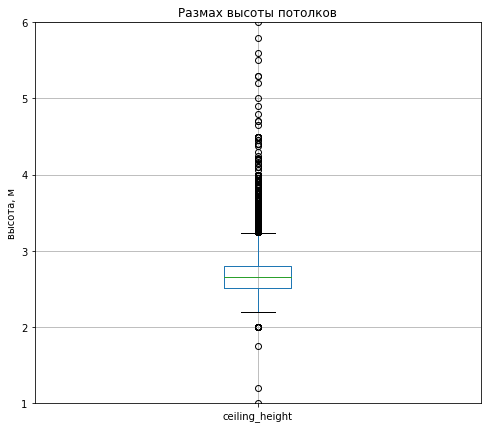

In [21]:
# Построим диаграмму размаха высоты потолков
data.boxplot(column='ceiling_height', figsize=(8, 7))
plt.title('Размах высоты потолков')
plt.ylim(1, 6)
plt.ylabel('высота, м')
plt.show()

*из графиков явно видно что значения ниже 2.2 и выше 3.2 являются выбросами.*

In [22]:
# заменим значения ниже 2.2 и выше 3.2, а так же пропущенные значения медианным
data.loc[data['ceiling_height'] < 2.2, 'ceiling_height'] = 2.65
data.loc[data['ceiling_height'] > 3.2, 'ceiling_height'] = 2.65

In [23]:
data['ceiling_height'] = data['ceiling_height'].fillna(2.65)

In [24]:
# Проверим
data['ceiling_height'].describe()

count    23699.000000
mean         2.667244
std          0.140652
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.200000
Name: ceiling_height, dtype: float64

In [25]:
data['ceiling_height'].isna().sum()

0

*Пропуски в столбе ceiling_height - отсутствуют.*

In [26]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

##### Столбец `floors_total`

In [27]:
# посмотрим на столбец
data['floors_total'].isna().sum()

86

In [28]:
data.loc[data['floors_total'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
186,12,11640000.0,65.20,2018-10-02T00:00:00,2,2.65,NaN,30.80,4,False,False,False,12.000000,0.0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.10,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,False,False,False,4.971538,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.80,2015-08-01T00:00:00,2,2.65,NaN,38.40,12,False,False,False,10.630000,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.60,2017-04-06T00:00:00,3,2.65,NaN,47.10,8,False,False,False,16.800000,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.00,2017-04-22T00:00:00,1,2.65,NaN,NaN,9,False,False,False,6.900000,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
1930,1,9750000.0,66.77,2016-05-13T00:00:00,2,2.65,NaN,NaN,4,False,False,False,11.813154,0.0,Санкт-Петербург,39886.0,10660.0,1.0,2276.0,3.0,244.0,90.0
2392,7,5395770.0,53.00,2017-06-29T00:00:00,2,2.65,NaN,29.00,22,False,False,False,9.000000,0.0,Санкт-Петербург,43074.0,10820.0,0.0,NaN,0.0,NaN,48.0
2846,4,2325000.0,27.80,2016-09-21T00:00:00,1,2.65,NaN,19.40,15,False,False,False,4.918462,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,307.0
2952,10,6500000.0,54.30,2019-04-23T00:00:00,1,2.65,NaN,22.20,6,False,False,False,12.300000,0.0,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
3031,9,6400000.0,56.70,2018-03-27T00:00:00,2,2.65,NaN,32.00,12,False,False,False,12.000000,0.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,231.0


Из данной выборки видно, что невозможно по остальным праметрам однозначно сказать об этажности дома. По-этому оставим эти данные пока без изменений.

##### Столбец `locality_name`

Информация о местонахождении объекта недвижимости - одна из ключевых. Но в 49 записях она пропущена, и восстановить ее из других источников не представляется возможным. Такие записи проще всего удалить.

In [29]:
data.drop(data['locality_name'].loc[data['locality_name'].isna()].index,inplace=True)

##### Столбец `living_area`

In [30]:
data['living_area'].describe()

count    21752.000000
mean        34.448356
std         22.037664
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

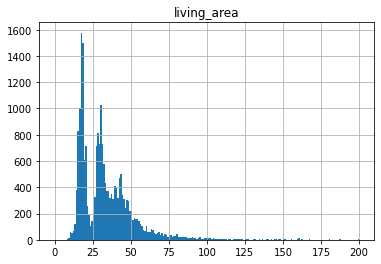

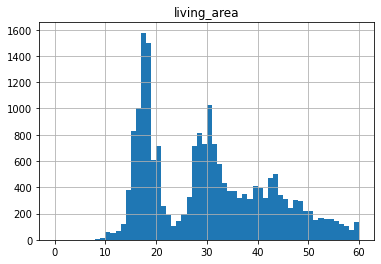

In [31]:
data.hist('living_area', bins=200, range=(0,200))
data.hist('living_area', bins=60, range=(0,60))
plt.show()

Большое количество квартир с жилой площадью от 10 до 60 кв.м.
Судя по гистограмме есть даже с с жилой площадью 2 кв.м???
Отбросим значения с жилой площадью меньше 10кв.м. и квартиры с площадью более 200 кв.м.

In [32]:
# Жилая площадь меньше 10 кв.м.
data.query('living_area < 10')['living_area'].count()

25

In [33]:
# Жилая площадь больше 200 кв.м.
data.query('living_area > 200')['living_area'].count()

31

In [34]:
# Отбросим значения с жилой площадью меньше 10кв.м. и с площадью более 200 кв.м.
data.drop(index=data.query('living_area < 10').index,inplace=True)
data.drop(index=data.query('living_area > 200').index,inplace=True)

В некоторых объявлениях продавцы указали общую площадь объекта недвижимости, но не указали ее распределение на жилую/нежилую. Для таких объявлений заполним отсутствующую информацию медианными значениями, через коэфициент, отражающий медианную долю жилой площади в общей площади квартиры.

In [35]:
#К-т доли жилой площади в общей площади квартиры (рассчитанный по медианным значениям)
living_area_k_median = data['living_area'].median() / data['total_area'].median()

Применим полученные коэфициенты, чтобы заполнить пропуски.

In [36]:
data['living_area'] = data['living_area'].fillna(living_area_k_median*data['total_area'])

In [37]:
# проверим
data['living_area'].isna().sum()

0

##### Столбец  `first_days_exposition`

Что касается даты размещения объявления: для гибкой работы со временем его лучше перевести в формат datetime.

In [38]:
# преобразуем first_day_exposition к типу datetime с помощью pd.to_datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# проверяем
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,False,False,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,False,False,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,False,False,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,91.730769,9,False,False,False,28.130769,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [39]:
data['first_day_exposition'].isna().sum()

0

##### Столбец  `days_exposition`

В столбце `days_exposition`указано количество дней, в течении которых было размещено объявление (от публикации до снятия).
Отсутствие данных в этом столбце означает, что данный показатель не может быть рассчитан, поскольку объявление о продаже еще не снято.

##### Столбцы с геолокацией

Посмотрим на пропуски в столбцах
- airports_nearest
- city_centers_nearest
- parks_around3000
- parks_nearest
- ponds_around3000
- ponds_nearest

In [40]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               85
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5530
city_centers_nearest     5509
parks_around_3000        5508
parks_nearest           15565
ponds_around_3000        5508
ponds_nearest           14541
days_exposition          3173
dtype: int64

По 55xx и более строкам данные геолокации отсутствуют полностью. Возможно, из-за технической ошибки при наполнении датасета, или из-за отсутствия технической возможности определения геолокации объекта недвижимости - точно этого мы уже никогда не узнаем.

Удалить 5,5 тыс. записей (а это около 20%)? Это значительная часть, и риск потерять значимую информацию слишком велик.

Эти строки можно было бы заполнить какой-нибудь заглушкой, типа "Данные отсутствуют", но тогда мы будем иметь в столбцах с данными геолокации значения различного типа (float и str), что может привести к проблемам при применении к этим столбцам математических методов. В то время, как пропуски NaN не помешают математическим методам анализа.

Будем держать пропуски геолокации "в уме" и оставим пока данные в этих столбцах без изменений.

По гистограммам выглядят нормально. Выбивается одна строчка с airports_nearest.

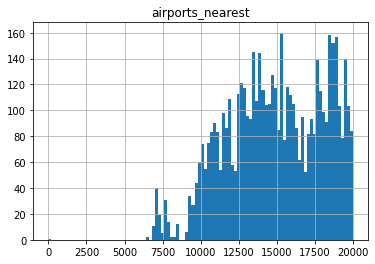

In [41]:
# посмотрим поближе
data.hist('airports_nearest', bins=100, range=(0,20000))
plt.show()

In [42]:
# подсчитаем кол-во квартир ближе 5 км от аэропорта
data.query('airports_nearest < 5000')['airports_nearest'].count()

1

Квартир ближе 5 км к аэропорту одна, она похоже располагается в аэропорту. Удаляем. 

In [43]:
data.drop(index=data.query('airports_nearest < 5000').index,inplace=True)

#### Обработка дубликатов

##### Обработка явных дубликатов

In [44]:
# проверим дубликаты и выведем их сумму
data.duplicated().sum()

0

*Явных дубликатов в датасете не наблюдается*

##### Обработка неявных дубликатов в столбце `locality_name`

In [45]:
def loc_length():
    return print('Количество уникальных занчений locality_name:', data['locality_name'].unique().shape[0])
loc_length()

Количество уникальных занчений locality_name: 364


In [46]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

заменяем все "ё" на "е"

In [47]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
loc_length()

Количество уникальных занчений locality_name: 330


заменяем "городской поселок" на "поселок городского типа":

In [48]:
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок городского типа')
loc_length()

Количество уникальных занчений locality_name: 323


#### Поиск и устранение редких и выбивающихся значений

Со столбцами, содержащими числовые значения, обработка выбросов и аномалий будет сделана следующим образом:

1.Сначала будет произведена общая оценка: размах вариации, средние и медианные значения, разброс значений и границы квартилей.

2.Оценка также будет проведена визуально (графически).

3.Затем, ориентируясь на границы квартилей, будут определены статистические выбросы.

4.Граница отсечения выбросов будет откорректирована вручную, исходя из значимости потерь в данных в случае отсечения строк с выбросами из датасета, а также, временами из общих соображений и здравого смысла)

##### Столбец `total_area` (общая площадь квартиры)

In [49]:
data['total_area'].describe()

count    23593.000000
mean        59.862668
std         32.738302
min         12.000000
25%         40.000000
50%         52.000000
75%         69.600000
max        631.000000
Name: total_area, dtype: float64

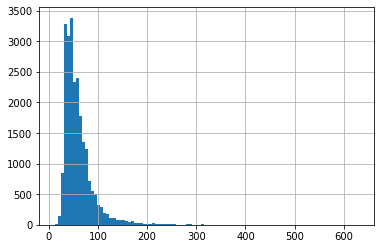

In [50]:
data['total_area'].hist(bins=100)
plt.show()

In [51]:
# подсчитаем кол-во выбросов больше 350 кв.м.
data.query('total_area > 350')['total_area'].count()

18

In [52]:
# удаляем выбросы свыше 350 кв.м.
data.drop(index=data.query('living_area > 200').index,inplace=True)

##### Столбец `kitchen_area` (площадь кухни)

In [53]:
data['kitchen_area'].describe()

count    23581.000000
mean        10.461560
std          5.722732
min          2.123077
25%          7.000000
50%          9.040000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

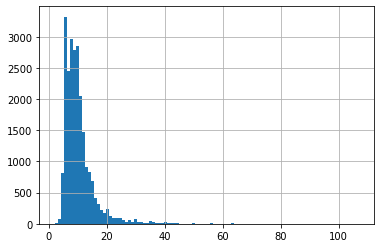

In [54]:
data['kitchen_area'].hist(bins=100)
plt.show()

In [55]:
# подсчитаем кол-во выбросов больше 45 кв.м
data.query('kitchen_area > 45')['kitchen_area'].count()

67

In [56]:
# удаляем выбросы свыше 45 кв.м
data.drop(index=data.query('kitchen_area > 200').index,inplace=True)

##### Столбец `rooms` (количество комнат)

In [57]:
data['rooms'].describe()

count    23581.000000
mean         2.062381
std          1.051781
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

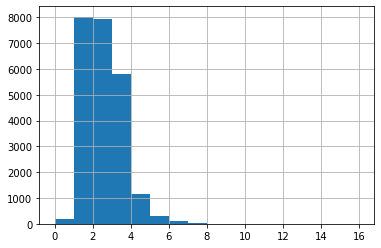

In [58]:
data['rooms'].hist(bins=16)
plt.show()

In [59]:
# подсчитаем кол-во выбросов больше 8 комнат:
data.query('rooms > 8')['rooms'].count()

13

In [60]:
# удаляем выбросы свыше 8 комнат:
data.drop(index=data.query('rooms > 8').index,inplace=True)

##### Столбец `balcony` (количество балконов)

In [61]:
data['balcony'].describe()

count    23568.000000
mean         0.592116
std          0.959484
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

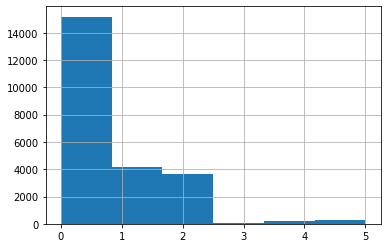

In [62]:
data['balcony'].hist(bins=6)
plt.show()

Количество балконов разное в каждой планировке, основная масса приходится на квартиры без балконов, хотя встречаются квартиры и с 2 и с 3 балконами. Квартиры с большим количеством балконов - редкость.

In [63]:
# подсчитаем кол-во выбросов больше 3-х балконов:
data.query('balcony > 3')['balcony'].count()

484

Однако, хотя удаление всех объявлений о продаже с количеством балконов больше трех было бы приемлимо (менее 5% от общего количества строк датасета), однако эта информация не настолько существенна для нашего анализа, чтобы потерять из-за нее такой объем данных. Поэтому, эти записи решено оставить.

##### Столбец `floor` (этаж квартиры)

In [64]:
data['floor'].describe()

count    23568.000000
mean         5.892227
std          4.882835
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

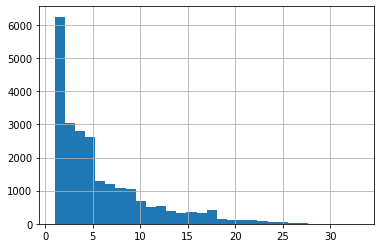

In [65]:
data['floor'].hist(bins=30)
plt.show()

In [66]:
# подсчитаем кол-во выбросов больше 30 этажей:
data.query('floor > 30')['floor'].count()

3

In [67]:
# удаляем выбросы свыше 30 этажей:
data.drop(index=data.query('floor > 30').index,inplace=True)

##### Столбец `floors_total` (общее количество этажей в доме)

In [68]:
data['floors_total'].describe()

count    23480.000000
mean        10.679089
std          6.590377
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

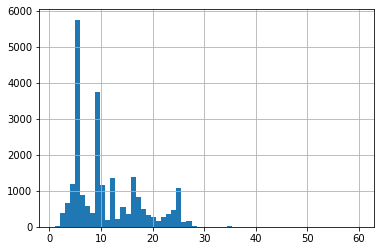

In [69]:
data['floors_total'].hist(bins=60)
plt.show()

In [70]:
# подсчитаем кол-во выбросов больше 30 этажей:
data.query('floors_total > 30')['floors_total'].count()

29

In [71]:
# удаляем выбросы свыше 30 этажей:
data.drop(index=data.query('floors_total > 30').index,inplace=True)

##### Столбец `last_price` (цена объекта)

In [72]:
data['last_price'].describe()

count    2.353600e+04
mean     6.329289e+06
std      7.941556e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.750000e+06
max      3.300000e+08
Name: last_price, dtype: float64

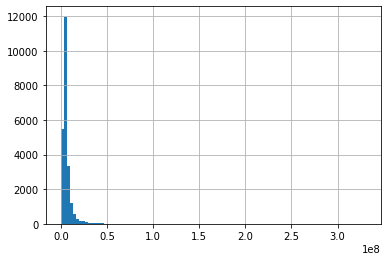

In [73]:
data['last_price'].hist(bins=100)
plt.show()

Наверное, цена - это очень индивидуальная и, иногда, очень субъективная характеристика. Поэтому, здесь вряд ли подойдут какие-то типовые рекомендации, наподобие модели "ящика с усами". Наверное, единственное, что здесь стоит сделать - избавиться от очень дорогой элитной недвижимости (более 50 млн.руб.). Эти объявления наверняка носят "штучный" характер и искажают общую картину статистическими "выбросами" (причем не только по цене, но, скорее всего, и по другим характеристикам: площадь, количество балконов и проч.).

In [74]:
# подсчитаем кол-во выбросов более 50 млн.руб.
data.query('last_price > 50000000')['last_price'].count()

103

In [75]:
# удаляем выбросы свыше 50 млн.руб.
data.drop(index=data.query('last_price > 50000000').index,inplace=True)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23433 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23433 non-null  int64         
 1   last_price            23433 non-null  float64       
 2   total_area            23433 non-null  float64       
 3   first_day_exposition  23433 non-null  datetime64[ns]
 4   rooms                 23433 non-null  int64         
 5   ceiling_height        23433 non-null  float64       
 6   floors_total          23348 non-null  float64       
 7   living_area           23433 non-null  float64       
 8   floor                 23433 non-null  int64         
 9   is_apartment          23433 non-null  bool          
 10  studio                23433 non-null  bool          
 11  open_plan             23433 non-null  bool          
 12  kitchen_area          23433 non-null  float64       
 13  balcony         

##### Общие результаты проведенной предобработки данных

- Изменили типы данных,
- привели имена столбцов к единому стилю,
- обработали явные и неявные дубликаты,
- также обработали пропуски.
- избавились от явных выбросов

По итогу предобработки данных наш датасет сократился на 266 строк, что составляет менее 2% от изначального датафрейма

Пропуски остались, но только в столбцах с геолокацией, которые мы оставили незатронутыми предобработкой.


### Посчитайте и добавьте в таблицу новые столбцы

#### Цена одного квадратного метра

In [77]:
# Добавим столбец с ценой за 1м² и округлим до копеек:
data['price_sq_metre'] = (data['last_price'] / data['total_area']).round(2)
# Проверяем
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_sq_metre
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,False,False,9.1,0.0,поселок городского типа Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.79


#### День недели, месяц и год публикации объявления

In [78]:
#Добавим в датафрейм с данными столбец с днями недели публикации (0 - понедельник, 1 - вторник и т.д.):
data['weekday'] = data['first_day_exposition'].dt.weekday

In [79]:
#Добавим в датафрейм с данными столбец с меясяцем публикации:
data['month'] = data['first_day_exposition'].dt.month

In [80]:
#Добавим в датафрейм с данными столбец с годом публикации:
data['year'] = data['first_day_exposition'].dt.year

In [81]:
# Проверяем
data.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_sq_metre,weekday,month,year
23694,9,9700000.0,133.81,2017-03-21,3,2.65,5.0,73.300000,3,False,False,False,13.830000,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,72490.85,1,3,2017
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.000000,4,False,False,False,8.500000,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,52542.37,0,1,2018
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.700000,1,False,False,False,10.031538,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44091.71,6,2,2018
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,44.278846,12,False,False,False,23.300000,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,149511.40,1,3,2017
23698,4,1350000.0,32.30,2017-07-21,1,2.50,5.0,12.300000,1,False,False,False,9.000000,0.0,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41795.67,4,7,2017


#### Тип этажа квартиры

Пройдемся циклом по датафрейму с данными, и заполним тип этажа квартиры:

In [82]:
# Функция для категоризации этажности в доме:
def floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
    
# Добавляем столбец с категорией этажа квартиры:
data['floor_type'] = data.apply(floor_type, axis=1)

In [83]:
# Проверяем
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_sq_metre,weekday,month,year,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,False,False,9.1,0.0,поселок городского типа Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.79,0,9,2018,другой


#### Расстояние до центра города в километрах

In [84]:
# Добавим в датафрейм новый столбец с расстоянием до центра города в км:
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)

In [85]:
# Проверяем
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_sq_metre,weekday,month,year,floor_type,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,False,False,9.1,0.0,поселок городского типа Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.79,0,9,2018,другой,NaN


  Итог о проделанной работе: 
  - Добавили необходимые столбцы и произвели расчеты по ним. 
  - Отметим, что из-за пропусков в исходных данных, в расчетных значениях также есть пропуски. В столбце floor_category для 85 строк категория этажа могла определиться неверно (вместо последний -> другой), т.к. значения количества этажей для этих объектов отсутствуют. Учитывая то, что доля возможных ошибок крайне мала, на результаты исследования они не повлияют.

### Проведите исследовательский анализ данных

#### Исследуем основные параметры объектов

##### Столбец 'total_area', общая площадь

In [86]:
# Посмторим описательную часть для этого столбца
data['total_area'].describe()

count    23433.000000
mean        58.889942
std         29.320814
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        413.500000
Name: total_area, dtype: float64

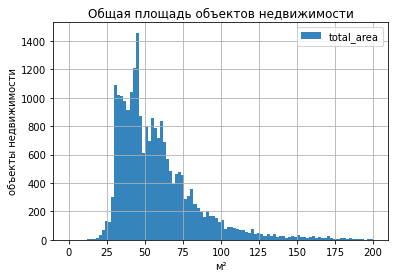

In [87]:
data.plot(
    kind='hist',
    y='total_area',
    histtype='bar',
    range=(0, 200),
    bins=100,
    linewidth=5,
    alpha=0.9,
    label='total_area',
    grid=True,
    legend=True,
)
plt.title('Общая площадь объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('объекты недвижимости')
plt.show()

Большинство квартир на рынке недвижимости имеют площадь в пределах от 30 до 80 м². Самый распространенный вариант - около 45 м². Очень малое количество квартир с общей площадью более 100 м² - скорее всего, это просто элитная недвижимость. Среднее значение - 58 м², медиана 52 м². У графика также наблюдается "хвост" из-за редких, но больших значений.

##### Столбец 'living_area', жилая площадь

In [88]:
# Посмторим описательную часть для этого столбца
data['living_area'].describe()

count    23433.000000
mean        33.785162
std         18.827842
min          7.500000
25%         19.000000
50%         30.000000
75%         42.000000
max        200.000000
Name: living_area, dtype: float64

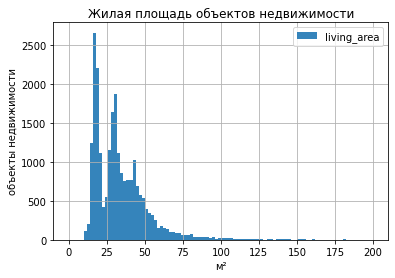

In [89]:
data.plot(
    kind='hist',
    y='living_area',
    range=(0, 200),
    bins=100,
    linewidth=5,
    alpha=0.9,
    label='living_area',
    grid=True,
    legend=True,
) 
plt.title('Жилая площадь объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('объекты недвижимости')
plt.show()

Кривая диаграммы жилой площади повторяет по форме диаграмму общей площади, но смещена влево (что логично, поскольку жилая площадь меньше общей площади). Большая часть объектов недвижимости имеют жилую площадь от 15 до 35 м². Самый распространенный вариант - около 15 м². Жилая площадь объектов более 60 м² встречается редко. С площадью меньше 15 м² также редкость. Среднее значение - 34 м², медиана 30 м². У графика также наблюдается "хвост" из-за редких, но больших значений.

##### Столбец 'kitchen_area', площадь кухни

In [90]:
# Посмторим описательную часть для этого столбца
data['kitchen_area'].describe()

count    23433.000000
mean        10.353889
std          5.373202
min          2.123077
25%          7.000000
50%          9.000000
75%         11.900000
max        100.700000
Name: kitchen_area, dtype: float64

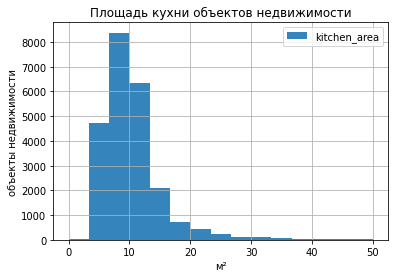

In [91]:
data.plot(
    kind='hist',
    y='kitchen_area',
    range=(0, 50),
    bins=15,
    linewidth=5,
    alpha=0.9,
    label='kitchen_area',
    grid=True,
    legend=True,
) 
plt.title('Площадь кухни объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('объекты недвижимости')
plt.show()

Большая часть объектов недвижимости имеют площадь кухни от 5 до 13 м². Самый распространенный вариант - около 7,5 м². Площадь кухни более 13 м² встречается редко. Площадь кухни менее 5 м² также редкость. Среднее значение - 10,4 м², медиана 9 м².

##### Столбец 'last_price', цена объекта

In [92]:
# Добавим в датафрейм новый столбец с ценой объекта в млн:
data['last_price_mln'] = data['last_price'] / 1000000

In [93]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_sq_metre,weekday,month,year,floor_type,city_centers_nearest_km,last_price_mln
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0,13.000
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0,3.350
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0,5.196
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0,10.000
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,False,False,9.1,0.0,поселок городского типа Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.79,0,9,2018,другой,NaN,2.890


In [94]:
# Посмторим описательную часть для этого столбца
data['last_price_mln'].describe()

count    23433.000000
mean         5.968144
std          4.898088
min          0.012190
25%          3.400000
50%          4.600000
75%          6.700000
max         50.000000
Name: last_price_mln, dtype: float64

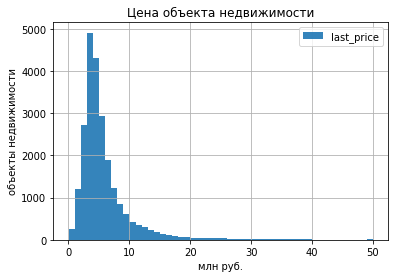

In [95]:
data.plot(
    kind='hist',
    y='last_price_mln',
    bins=50,
    linewidth=5,
    alpha=0.9,
    label='last_price',
    grid=True,
    legend=True,
)
plt.title('Цена объекта недвижимости')
plt.xlabel('млн руб.')
plt.ylabel('объекты недвижимости')
plt.show()

Большинство объектов недвижимости имеют цену в пределах от 3 до 5 млн. руб.. Самый распространенный вариант - около 3.5 млн.руб.. Вариантов с ценой более 10 млн немного. Среднее значение - 6,5 млн, медиана 4,6 млн.

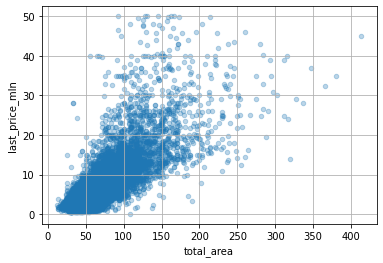

In [96]:
(data.plot(
           x='total_area', 
           y='last_price_mln', 
           kind='scatter', 
           grid=True, 
           alpha=0.3))
plt.show()

Цена объекта недвижимости тесно связана с его общей площадью, однако по мере увеличения этих параметров взаимосвязь между ними существенно слабеет.

##### Столбец 'rooms', количество комнат

In [97]:
# Посмторим описательную часть для этого столбца
data['rooms'].describe()

count    23433.000000
mean         2.048863
std          1.021764
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

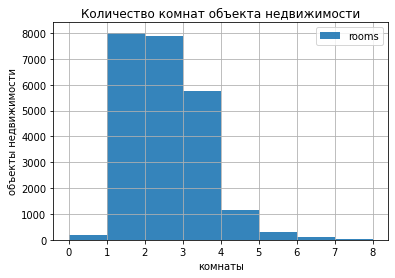

In [98]:
data.plot(
    kind='hist',
    y='rooms',
    bins=8,
    linewidth=5,
    alpha=0.9,
    label='rooms',
    grid=True,
    legend=True,
) 
plt.title('Количество комнат объекта недвижимости')
plt.xlabel('комнаты')
plt.ylabel('объекты недвижимости')
plt.show()

Большая часть планировок имеет 1,2,3 реже 4 комнаты. В сумме данные планировки занимают около 90% рынка. Среднее и медиана 2 комнаты точны. 

##### Столбец 'ceiling_height', высота потолков

In [99]:
# Посмторим описательную часть для этого столбца
data['ceiling_height'].describe()

count    23433.000000
mean         2.666475
std          0.140083
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.200000
Name: ceiling_height, dtype: float64

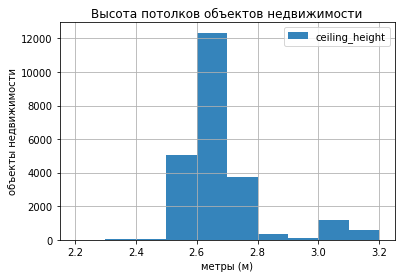

In [100]:
data.plot(
    kind='hist',
    y='ceiling_height',
    bins=10,
    linewidth=5,
    alpha=0.9,
    label='ceiling_height',
    grid=True,
    legend=True,
)
plt.title('Высота потолков объектов недвижимости')
plt.xlabel('метры (м)')
plt.ylabel('объекты недвижимости')
plt.show()

 Большинство объектов недвижимости имеют высоту потолков 2,5 м и 2,65 м(большинство). Реже представлены варианты от 2,7м до 2,85 м. Среднее 2,7 м и медиана 2,65 м. Отличительной особенностью Петербурга является старая застройка, с потолками выше 3 м.

##### Столбец 'floor', этаж квартиры

In [101]:
# Посмторим описательную часть для этого столбца
data['floor'].describe()

count    23433.000000
mean         5.880937
std          4.861850
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

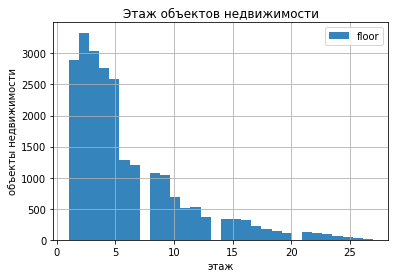

In [102]:
data.plot(
    kind='hist',
    y='floor',
    bins=30,
    linewidth=5,
    alpha=0.9,
    label='floor',
    grid=True,
    legend=True,
)
plt.title('Этаж объектов недвижимости')
plt.xlabel('этаж')
plt.ylabel('объекты недвижимости')
plt.show()

Большинство объектов недвижимости расположены с 2 по 4 этаж. Реже представлены варианты с 4 по 7.

##### Столбец 'floor_type', тип этажа квартиры

In [103]:
# Вызовем describe
data['floor_type'].describe()

count      23433
unique         3
top       другой
freq       17249
Name: floor_type, dtype: object

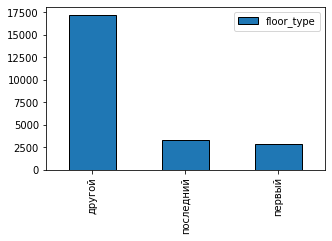

In [104]:
# Отобразим на графике
data['floor_type'].value_counts().plot.bar(figsize=(5, 3), ec='black', legend=True)
plt.show()

Объекты недвижимости, расположенные на первом и последним этажах имеют примерно одинаковые значения и их доля не велика,примерно по 10% от общего объема предложения на рынке недвижимости каждый. В основном объекты расположены на этажах между первым и последним

##### Столбец 'floors_total', общее количество этажей в доме

In [105]:
# Посмторим описательную часть для этого столбца
data['floors_total'].describe()

count    23348.000000
mean        10.663097
std          6.535497
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

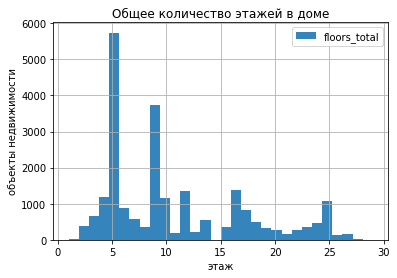

In [106]:
data.plot(
    kind='hist',
    y='floors_total',
    bins=30,
    linewidth=5,
    alpha=0.9,
    label='floors_total',
    grid=True,
    legend=True,
)
plt.title('Общее количество этажей в доме')
plt.xlabel('этаж')
plt.ylabel('объекты недвижимости')
plt.show()

В основном на рынке преобладают серии домов с 5-ти и 9-ти этажной застройкой. Среднее 10 этаж и медиана 9 этаж.

##### Столбец 'city_centers_nearest', расстояние до центра города в метрах

In [107]:
# Выведем описательную статистику для столбца
data['city_centers_nearest'].describe()

count    17926.000000
mean     14266.108502
std       8598.048895
min        181.000000
25%       9404.250000
50%      13145.000000
75%      16298.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

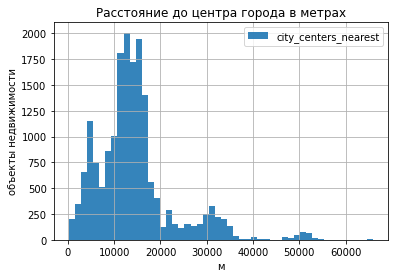

In [108]:
data.plot(
    kind='hist',
    y='city_centers_nearest',
    bins=50,
    linewidth=5,
    alpha=0.9,
    label='city_centers_nearest',
    grid=True,
    legend=True,
)
plt.title('Расстояние до центра города в метрах')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()

Большинство объектов недвижимости расположены на удалении 11-15 км от центра. Остальные варианты представлены реже.

##### Столбец 'airports_nearest', расстояние до ближайшего аэропорта

In [109]:
# Выведем описательную статистику для столбца
data['airports_nearest'].describe()

count    17905.000000
mean     28841.192851
std      12680.593292
min       6450.000000
25%      18500.000000
50%      26812.000000
75%      37407.000000
max      84869.000000
Name: airports_nearest, dtype: float64

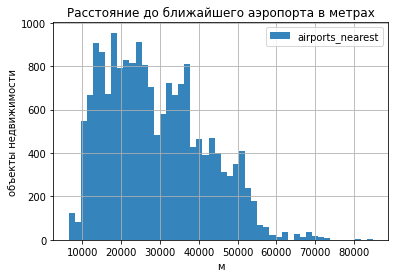

In [110]:
data.plot(
    kind='hist',
    y='airports_nearest',
    bins=50,
    linewidth=5,
    alpha=0.9,
    label='airports_nearest',
    grid=True,
    legend=True,
)
plt.title('Расстояние до ближайшего аэропорта в метрах')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()

Большинство объектов недвижимости расположены на удалении от аэропорта на расстоянии 13-25 км. Ближайший к аэропорту объект на расстоянии 6,5 км.

##### Столбец 'parks_nearest', расстояние до ближайшего парка

In [111]:
# Посмотрим описательную статистику
data['parks_nearest'].describe()

count    7926.000000
mean      492.287913
std       342.572456
min         1.000000
25%       288.000000
50%       456.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

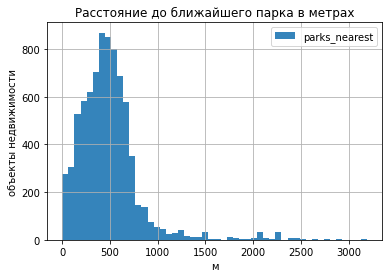

In [112]:
data.plot(
    kind='hist',
    y='parks_nearest',
    bins=50,
    linewidth=5,
    alpha=0.9,
    label='parks_nearest',
    grid=True,
    legend=True,
)
plt.title('Расстояние до ближайшего парка в метрах')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()

Большинство объектов недвижимости расположены на удалении от ближайшего парка на расстоянии 400-600м. Ближайшие к парку объекты на расстоянии до 500м.

##### Столбец 'weekday', день публикации объявления

In [113]:
# Посмторим описательную часть для этого столбца
data['weekday'].describe()

count    23433.000000
mean         2.566850
std          1.788629
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64

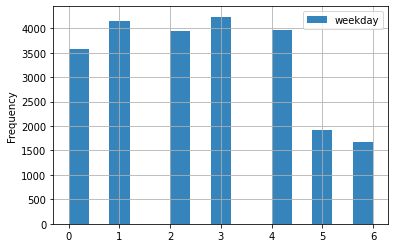

In [114]:
data.plot(
    kind='hist',
    y='weekday',
    bins=15,
    linewidth=5,
    alpha=0.9,
    label='weekday',
    grid=True,
    legend=True,
)
plt.show()

Как правило, объявления люди размещают в будние дни. И на много реже в выходные

##### Столбец 'month', месяц публикации объявления

In [115]:
# Посмторим описательную часть для этого столбца
data['month'].describe()

count    23433.000000
mean         6.403576
std          3.490980
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

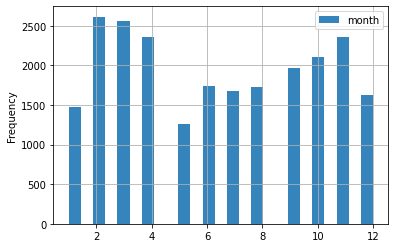

In [116]:
data.plot(
    kind='hist',
    y='month',
    bins=25,
    linewidth=5,
    alpha=0.9,
    label='month',
    grid=True,
    legend=True,
)
plt.show()

За месяц до и сразу после начала года люди реже размещают объявления. Также определенный спад прослеживается в мае и летние месяцы. Чаще всего объявления публиковали после январских праздников, с февраля по апрель, а также в с сентября по ноябрь включительно.

**Вывод:** Предварительно можно составить представление о типичном объекте недвижимости из исходных данных: квартира с 1 или 2 комнатами, 5-ти или 9-ти этажка (с квартирой с 1 по 4 этаж), общей площадью около 45 м², площадью кухни около 7,5 м², с высотой потолков 2,65 м, стоимостью около 3.5 млн.руб, расположенной на удалении от центра на расстоянии 11000-15000 метров, от аэропорта на расстоянии 13000-25000 м, до ближайшего парка около 500 метров.

#### Как быстро продавались квартиры?

In [117]:
#Посмотрим общую информацию о продолжительности продаж квартир:
data['days_exposition'].describe()

count    20300.000000
mean       179.944236
std        219.148878
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее равно 180 дням , медианное значение - 95 дням

Text(0, 0.5, 'объекты недвижимости')

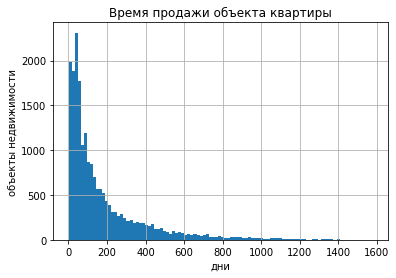

In [118]:
#Посмотрим форму распределения данных в столбце 'days_exposition'
data['days_exposition'].hist(bins=100);
plt.title('Время продажи объекта квартиры')
plt.xlabel('дни')
plt.ylabel('объекты недвижимости')

На первый взгляд, форма распределения похожа на типичное распределение Пуассона.

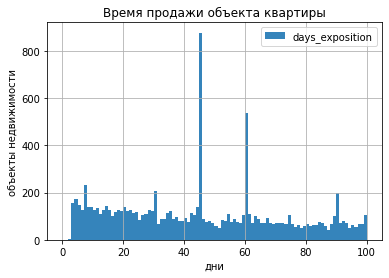

In [119]:
data.plot(
    kind='hist',
    y='days_exposition',
    bins=100,
    range=(0,100),
    linewidth=5,
    alpha=0.9,
    label='days_exposition',
    grid=True,
    legend=True,
)
plt.title('Время продажи объекта квартиры')
plt.xlabel('дни')
plt.ylabel('объекты недвижимости')
plt.show()

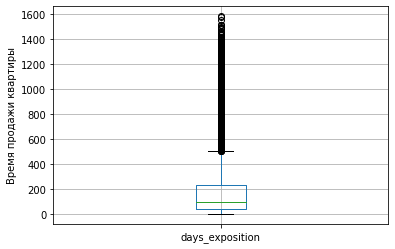

In [120]:
#диаграмма размаха
data.boxplot('days_exposition')
plt.ylabel('Время продажи квартиры')
plt.show()

Нижний "ус" отсекает множество на уровне нуля. Это означает, что нижняя граница скорости продаж вписывается в нормальные значения. Что же касается верхней границы - всё, что касается продаж чуть выше 500 дней, является статистическими выбросами. Это "ненормальная" продолжительность продаж, и для выводов о "нормальной" продолжительности продаж такие случаи нам не нужны. От них лучше избавиться.

Сформулируем верхнюю границу выбросов чуть менее радикально. Скажем так: квартиры, которые продаются на рынке более полутора лет, являются скорее существенным отклонением от нормы по скорости продаж.

In [121]:
#Посмотрим, сколько таких квартир на рынке продаж свыше 1,5 лет:
data.query('days_exposition > 365*1.5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_sq_metre,weekday,month,year,floor_type,city_centers_nearest_km,last_price_mln
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.300000,4,False,False,False,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0,5.196000
17,6,4180000.0,36.00,2016-09-09,1,2.65,17.0,16.500000,7,False,False,False,11.000000,1.0,Санкт-Петербург,33564.0,14616.0,0.0,NaN,1.0,859.0,571.0,116111.11,4,9,2016,другой,15.0,4.180000
23,11,2950000.0,32.00,2016-10-29,1,2.60,9.0,17.700000,9,False,False,False,6.100000,0.0,Санкт-Петербург,15414.0,14211.0,2.0,517.0,1.0,190.0,615.0,92187.50,5,10,2016,последний,14.0,2.950000
35,6,15500000.0,149.00,2017-06-26,5,2.65,5.0,104.000000,4,False,False,False,17.000000,0.0,Санкт-Петербург,23670.0,3502.0,0.0,NaN,1.0,779.0,644.0,104026.85,0,6,2017,другой,4.0,15.500000
42,13,22000000.0,161.80,2015-07-08,4,2.80,4.0,80.900000,2,False,False,False,17.600000,5.0,Петергоф,35416.0,30605.0,2.0,47.0,1.0,907.0,987.0,135970.33,2,7,2015,другой,31.0,22.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23655,1,2414306.0,40.50,2016-09-08,1,2.56,18.0,19.600000,10,False,False,False,7.165385,0.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,627.0,59612.49,3,9,2016,другой,NaN,2.414306
23664,5,9000000.0,110.00,2015-12-10,4,2.65,7.0,64.600000,5,False,False,False,15.800000,0.0,Санкт-Петербург,26313.0,5016.0,3.0,417.0,1.0,118.0,816.0,81818.18,3,12,2015,другой,5.0,9.000000
23672,5,3000000.0,30.80,2016-06-08,1,2.65,5.0,16.100000,3,False,False,False,6.300000,0.0,Санкт-Петербург,44614.0,14193.0,2.0,258.0,0.0,NaN,808.0,97402.60,2,6,2016,другой,14.0,3.000000
23675,8,3550000.0,39.50,2016-10-03,1,2.65,16.0,19.000000,13,False,False,False,8.500000,0.0,Санкт-Петербург,25740.0,14951.0,0.0,NaN,0.0,NaN,721.0,89873.42,0,10,2016,другой,15.0,3.550000


Долгопродающиеся квартиры - это около 7% (1461 из 23433). Довольно существенная доля, однако влияние на качество анализа, которое данные объекты оказывают, скорее отрицательное. Они сильно искажают на статистические показатели скорости продаж. Исключим их.

In [122]:
# Обновим датафрейм без выбросов
data_df = data.query('days_exposition < 365*1.5')

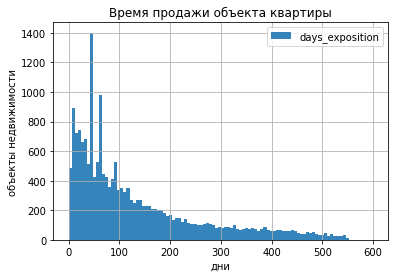

In [123]:
data_df.plot(
    kind='hist',
    y='days_exposition',
    bins=100,
    range=(0,600),
    linewidth=5,
    alpha=0.9,
    label='days_exposition',
    grid=True,
    legend=True,
)
plt.title('Время продажи объекта квартиры')
plt.xlabel('дни')
plt.ylabel('объекты недвижимости')
plt.show()

На графике видны пики около 50-60 дней, но при таком длинном "хвосте" из данных делать выводы не уместно. Изменим масштаб - изменим период до 100 дней

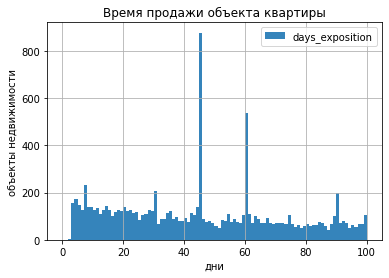

In [124]:
data_df.plot(
    kind='hist',
    y='days_exposition',
    bins=100,
    range=(0,100),
    linewidth=5,
    alpha=0.9,
    label='days_exposition',
    grid=True,
    legend=True,
)
plt.title('Время продажи объекта квартиры')
plt.xlabel('дни')
plt.ylabel('объекты недвижимости')
plt.show()

аномалии находятся на 45, 60, 90,  7, 30 днях. 
Данные аномалии связаны с тем, что сроки публикации на площадке Яндекс.Недвижимость соответсвуют этим дням. 
- Продажа комнаты - 45 дней
- Продажа дома, участка или гаража - 90 дней
- Продажа квартиры:   
    до 4,5 млн — 45 дней,  
    от 4,5 до 10 млн — 60 дней,  
    от 10 млн — 90 дней
- Аренда комнаты - 7 дней
- Аренда комнаты, участка или гаража - 30 дней 
- Аренда и продажа коммерческого объекта - 60 дней 

- Аренда квартиры: до 20 тыс/м — 7 дней, от 20 до 40 тыс/м — 14 дней, от 40 тыс/м — 21 день
- Аренда посуточная: Квартира, Комната, Дом / участок, Гараж - 60 дней.

**Вывод:** На основании построенных графиков можно сделать следующие выводы. Продажа квартиры в течении двух месяцев будем считать быстрой; нормальной продолжительностью продажи является срок от двух до шести месяцев; от полугода до полутора лет - долго, но в пределах нормы. Однако не редки случаи, когда объект недвижимости продается и более полутора лет - принятые за выбросы. Такие случаи на рынке недвижимости являются отклонением от общего правила, но также встречаются на практике.

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

In [125]:
# Запишем перечень факторов в переменную `list_price`.
# Первой укажем цену, тогда первый столбец матрицы покажет нам цависимость цены от каждого из факторов.
list_price=(['total_area',# общая площадь
       'living_area',# жилая площадь
       'kitchen_area',# площадь кухни
       'rooms',# количество комнат
       #'weekday',# день публикации объявления
       #'month',# месяц публикации объявления
       #'year',# месяц публикации объявления 
       'last_price_mln'# цена объекта
      ])

Для анализа влияния факторов на цену объекта недвижимости, построим матрицу диаграмм рассеяния для каждого из факторов, чтобы визуально оценить наличие связи между ценой и каждым из факторов.

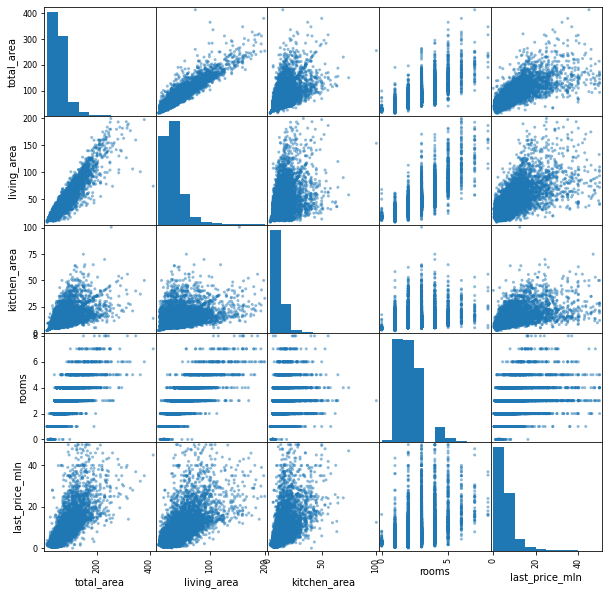

In [126]:
pd.plotting.scatter_matrix(data.loc[:,list_price], figsize=(10, 10));

Так же выведем матрицу коэффициента корреляции

In [127]:
data.loc[:,list_price].corr()

,total_area,living_area,kitchen_area,rooms,last_price_mln
total_area,1.000000,0.933928,0.622510,0.785956,0.779823
living_area,0.933928,1.000000,0.430156,0.858410,0.685931
kitchen_area,0.622510,0.430156,1.000000,0.290456,0.620231
rooms,0.785956,0.858410,0.290456,1.000000,0.497649
last_price_mln,0.779823,0.685931,0.620231,0.497649,1.000000


Зависимость прямопропорциональная (по убыванию коэффициента корреляции Пирсона)
- чем больше площадь квартиры, тем выше цена,
- чем больше жилая площадь квартиры, тем выше ее стоимость,
- чем больше площадь кухни, тем выше ее стоимость,
- чем больше число комнат (до 3 комнат) стоимость квартир растет, от 3 до 4 - цена примерно одинаковая, для 5 комнат стоимость снижается. Снижение скорее всего связанно со старым фондом недвижимости, где есть 5-ти комнатные квартиры с малой площадью.

~~При взгляде на коэффициент корреляции год, день недели и месяц размещения практически не связаны со стоимостью квартир. Однако, связь здесь может быть нелинейной.~~

Изучим зависимость цены от даты размещения: дня недели, месяца и года.

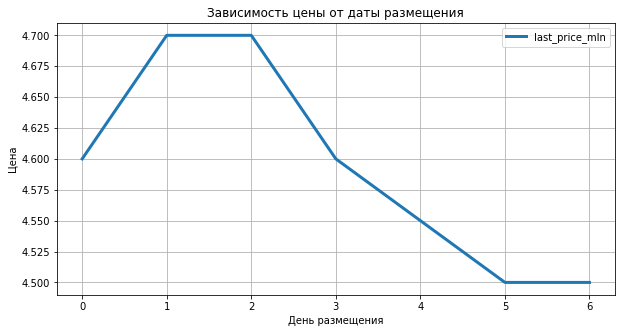

In [128]:
# зависимость от дня недели размещения
(data
     .pivot_table(index='weekday', values='last_price_mln', aggfunc = 'median')
     .plot(grid=True, figsize=(10, 5),linewidth=3,title='Зависимость цены от даты размещения')
)
plt.xlabel('День размещения')
plt.ylabel('Цена');

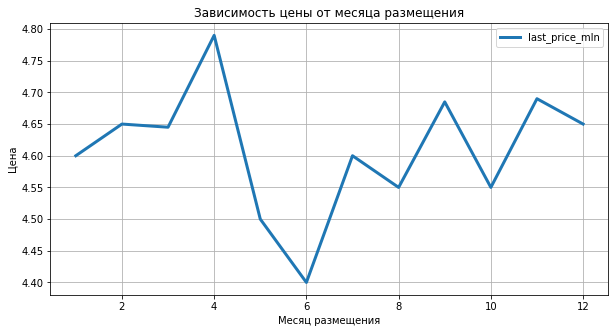

In [129]:
# зависимость от месяца размещения
(data
     .pivot_table(index='month', values='last_price_mln', aggfunc = 'median')
     .plot(grid=True, figsize=(10, 5),linewidth=3, title='Зависимость цены от месяца размещения')
)
plt.xlabel('Месяц размещения')
plt.ylabel('Цена');

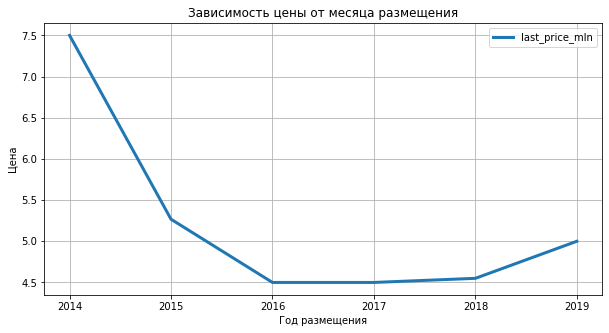

In [130]:
# зависимость от года размещения
(data
     .pivot_table(index='year', values='last_price_mln', aggfunc = 'median')
     .plot(grid=True, figsize=(10, 5),linewidth=3, title='Зависимость цены от месяца размещения')
)
plt.xlabel('Год размещения')
plt.ylabel('Цена');

Проведя анализ зависимости цены от даты размещения по медиане приходим к следующим выводам:
- наименьшая цена в объявлениях, размещенных на выходных, наивысшия в вторник-среда.
- квартиры, выставленные в апреле,  дороже всего. Дешевле всего - в мае.
- наблюдается падение в стоимости жилья в 2014-2017 годах и подьем стоимости начиная с 2018 года, что вызвано скорей всего большим спросом на рынке недвижимости.

 В виду того, что столбец `floore_type` имеет тип данных object (по условию задания) - он не вошел в матрицу коэффицентов корреляции и матрицу диаграмм рассеяния. Посмотрим на зависимость отдельно.

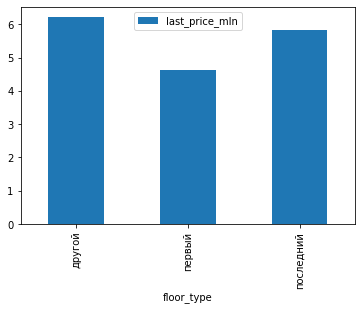

In [131]:
data.pivot_table(index='floor_type',values='last_price_mln').plot(y='last_price_mln', kind='bar')
plt.show()

**вывод:** квартиры, расположенные на первом и последнем этаже, стоят дешевле, чем на любом другом.

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [132]:
#Сначала отберем 10 населенных пунктов с наибольшим числом объявлений, и запишем список в переменную top_10:
top_10_localities = data['locality_name'].value_counts().head(10)
top_10_localities

Санкт-Петербург      15509
поселок Мурино         555
поселок Шушары         439
Всеволожск             398
Пушкин                 368
Колпино                338
поселок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

In [133]:
# Выведем среднюю цену за кв м по топ 10 населенным пунктам
top_10 = (data
 .query('locality_name in @top_10_localities.index')
 .pivot_table(index='locality_name', values='price_sq_metre')
 .sort_values(by='price_sq_metre', ascending=False))
top_10

,price_sq_metre
locality_name,
Санкт-Петербург,112241.047663
Пушкин,103100.890978
деревня Кудрово,92473.547559
поселок Парголово,90175.913089
поселок Мурино,85653.613766
поселок Шушары,78703.263349
Колпино,75424.579112
Гатчина,68746.146515
Всеволожск,68654.473970


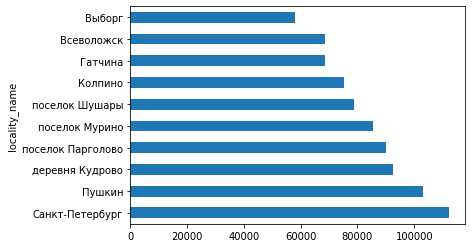

In [134]:
top_10['price_sq_metre'].plot(kind='barh');

In [135]:
# Найдем самую высокую и самую низкую цену квадратного метра, усредненную по каждому населенному пункту
min_price = data.groupby('locality_name')['price_sq_metre'].mean().min()
max_price = data.groupby('locality_name')['price_sq_metre'].mean().max()

Населенный пункт с самой низкой средней ценой на недвижимость:

In [136]:
data.pivot_table(index='locality_name', values='price_sq_metre').query('price_sq_metre == @min_price')

,price_sq_metre
locality_name,
деревня Старополье,11206.22


Населенный пункт с самой высокой средней ценой на недвижимость:

In [137]:
data.pivot_table(index='locality_name', values='price_sq_metre').query('price_sq_metre == @max_price')

,price_sq_metre
locality_name,
Зеленогорск,115122.799583


**Вывод:** 
- Лидером, как по количеству объявлений, так и по цене за квадратный метр в Топ-10, является Санкт-Петербург. Самые низкие цены Топ-10 в Выборге. 
- Так же были найдены min и max средней цены за квадратный метр среди населенных пунктов. Минимальные цены обнаружены в одной из деревень (деревня Старополье) - вполне ожидаемо. Абсолютным лидером по средней цене квадратного метра оказался Зеленогорск (внутригородское муниципальное образование в составе Курортного района города федерального значения Санкт-Петербурга, климатический курорт на северном берегу Финского залива Балтийского моря).

#### Исследуем, как стоимость объектов зависит от расстояния до центра Санкт-Петербурга.

Посторим столбчатую диаграмму со значением средней цены для каждого из километра

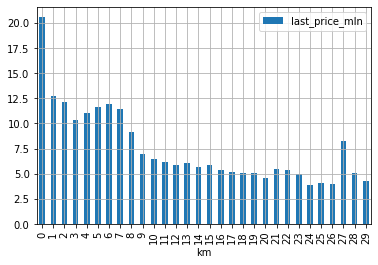

In [138]:
data_spb =(
    data[data['locality_name']=='Санкт-Петербург']
    .pivot_table(
        index='city_centers_nearest_km',
        values='last_price_mln',
        aggfunc='mean')
    )
data_spb['km'] = data_spb.index.astype('int')
data_spb.plot( x='km', y='last_price_mln', kind='bar', grid=True);

На графике после 7 км заметно, что цена меняется. Скорее всего центр города укладывается в радиус от 7-8 км. Резкий всплеск на 27 километре связан с малым количеством наблюдений (аномально высоким для данного участка).

In [139]:
data_spb['last_price_mln'].corr(data_spb['km'])

-0.7954463575882861

Зависимость цены от расстояния от центра города прослеживается на графике довольно явно, и коэффициент корреляции это подтверждает . Чем дальше от центра тем больше падает цена недвижимости. Однако темпы падения цены на надвижемость по мере удаления от центра замедляются, что говорит о нелинейном характере этой зависимости.

### Общий вывод

В предоставленном наборе данных (размером 23699 строк на 12 колонок) была проведена предобработка данных (согласно приведенному ниже чек-листу) для проведения исследовательского анализа данных по следующим вопросам:

1. Как быстро продавались квартиры?
 - быстрые продажи квартир - в течении двух месяцев; 
 - с нормальной продолжительностью продажи - от двух до шести месяцев; 
 - долгие - от полугода до полутора лет , но в пределах нормы.

2. Какие факторы больше всего влияют на общую (полную) стоимость объекта?  
 2.1 В порядке убывания:
 - площадь квартиры (коэффициент корреляции - 0.78),
 - жилая площадь квартиры (коэффициент корреляции - 0.69),
 - площадь кухни (коэффициент корреляции - 0.62),
 - число комнат (коэффициент корреляции - 0.5) - (до 3 комнат) стоимость квартир растет, от 3 до 4 - цена примерно одинаковая, для 5 комнат стоимость снижается. Снижение скорее всего связанно со старым фондом недвижимости, где есть 5-ти комнатные квартиры с малой площадью.
 
 2.2 Проведя анализ зависимости цены от даты размещения по медиане приходим к следующим выводам:
 - наименьшая цена в объявлениях, размещенных на выходных, наивысшия в вторник-среда.
 - квартиры, выставленные в апреле,  дороже всего. Дешевле всего - в мае.
 - наблюдается падение в стоимости жилья в 2014-2017 годах и подьем стоимости начиная с 2018 года, что вызвано скорей всего большим спросом на рынке недвижимости.
  
 2.3 Так же была выявленна зависимость цены от этажа продаваемых объектов недвижимости. Тип этажа напрямую влияет на  итоговую цену: первые этажи самые дешевые, последние - дороже, а не относящиеся к крайним - самые дорогие

3. Какая средняя стоимость квадратного метра в 10 населённых пунктах с наибольшим числом объявлений? Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.

    В ТОП-10 по средней стоимости квадратного метра с наибольгим кол-вом обявлений входят в основном ближайшие к Санкт-Петербургу города и самые крупные города области:

    - Санкт-Петербург     - 112241  
    - Пушкин	          - 103100  
    - деревня Кудрово	  - 92473  
    - поселок Парголово   -	90175  
    - поселок Мурино	  - 85653  
    - поселок Шушары	  - 78703  
    - Колпино	          - 75424  
    - Гатчина	          - 68746  
    - Всеволожск	      - 68654  
    - Выборг	          - 58141  

Однако населенные пункты с min и max средней ценой за квадратный метр не вошли в топ-10. Минимальные цены обнаружены в одной из деревень (деревня Старополье) - 11206.22 . Абсолютным лидером по средней цене квадратного метра оказался Зеленогорск - 115122.8 (внутригородское муниципальное образование в составе Курортного района города федерального значения Санкт-Петербурга, климатический курорт на северном берегу Финского залива Балтийского моря).
 

4. как стоимость объектов зависит от расстояния до центра Санкт-Петербурга?

Анализ влияния удаленности от центра города на стоимость недвижимости на примере Санкт-Петербурга показал, что это влияние довольно существенное (корреляция на уровне 80 %), и по мере удаленности от центра города цена квадратного метра недвижимости падает довольно значительно. Эта тенденция особенно заметна вбизи центра, и сохраняется по мере удаления. Однако темпы падения цены квадратного метра по мере удаления от центра замедляются, что говорит о нелинейном характере этой зависимости.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод